In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

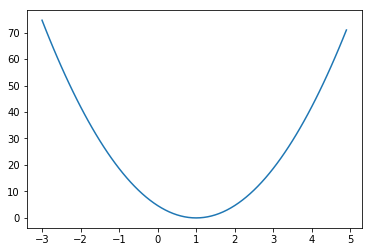

In [3]:
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)
hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess = tf.Session()

sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
plt.plot(W_val, cost_val)
plt.show()

In [4]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X * W

cost = tf.reduce_sum(tf.square(hypothesis - Y))

learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

sess = tf.Session()

sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict = {X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y:y_data}), sess.run(W))

0 3.15091 [ 0.52559]
1 0.896258 [ 0.74698132]
2 0.254936 [ 0.86505669]
3 0.072515 [ 0.92803025]
4 0.0206264 [ 0.96161616]
5 0.0058671 [ 0.97952861]
6 0.00166886 [ 0.98908192]
7 0.000474698 [ 0.99417704]
8 0.000135024 [ 0.99689442]
9 3.84063e-05 [ 0.99834371]
10 1.09241e-05 [ 0.99911666]
11 3.10729e-06 [ 0.99952888]
12 8.83566e-07 [ 0.99974877]
13 2.51351e-07 [ 0.99986601]
14 7.14778e-08 [ 0.99992853]
15 2.03727e-08 [ 0.99996185]
16 5.79086e-09 [ 0.99997967]
17 1.63978e-09 [ 0.99998915]
18 4.70056e-10 [ 0.99999422]
19 1.34492e-10 [ 0.9999969]
20 3.89946e-11 [ 0.99999833]


## optimizer

In [9]:
X = [1, 2, 3]
Y = [1, 2, 3]

#W = tf.Variable(5.0)
W = tf.Variable(-3.0)

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(10):
    print(step, sess.run(W))
    sess.run(train)

0 -3.0
1 0.733334
2 0.982222
3 0.998815
4 0.999921
5 0.999995
6 1.0
7 1.0
8 1.0
9 1.0


In [17]:
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(5.)

hypothesis = X * W

gradient = tf.reduce_mean((W * X - Y) * X) * 2

cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

#get gradients
gvs = optimizer.compute_gradients(cost, [W])

apply_gradients = optimizer.apply_gradients(gvs)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(30):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradients)

0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [33.848888, 4.6266665, [(33.848888, 4.6266665)]]
2 [30.689657, 4.2881775, [(30.689657, 4.2881775)]]
3 [27.825287, 3.9812808, [(27.825287, 3.9812808)]]
4 [25.228262, 3.703028, [(25.228264, 3.703028)]]
5 [22.873621, 3.4507453, [(22.873623, 3.4507453)]]
6 [20.738752, 3.2220092, [(20.738752, 3.2220092)]]
7 [18.803137, 3.0146217, [(18.803137, 3.0146217)]]
8 [17.048176, 2.8265903, [(17.048176, 2.8265903)]]
9 [15.457013, 2.6561086, [(15.457014, 2.6561086)]]
10 [14.014359, 2.5015385, [(14.01436, 2.5015385)]]
11 [12.706352, 2.3613949, [(12.706352, 2.3613949)]]
12 [11.520427, 2.2343314, [(11.520427, 2.2343314)]]
13 [10.445186, 2.119127, [(10.445186, 2.119127)]]
14 [9.4703016, 2.0146751, [(9.4703016, 2.0146751)]]
15 [8.5864067, 1.9199722, [(8.5864067, 1.9199722)]]
16 [7.7850089, 1.8341081, [(7.7850089, 1.8341081)]]
17 [7.0584083, 1.756258, [(7.0584083, 1.756258)]]
18 [6.3996239, 1.685674, [(6.3996239, 1.685674)]]
19 [5.8023257, 1.6216778, [(5.8023257, 1.62